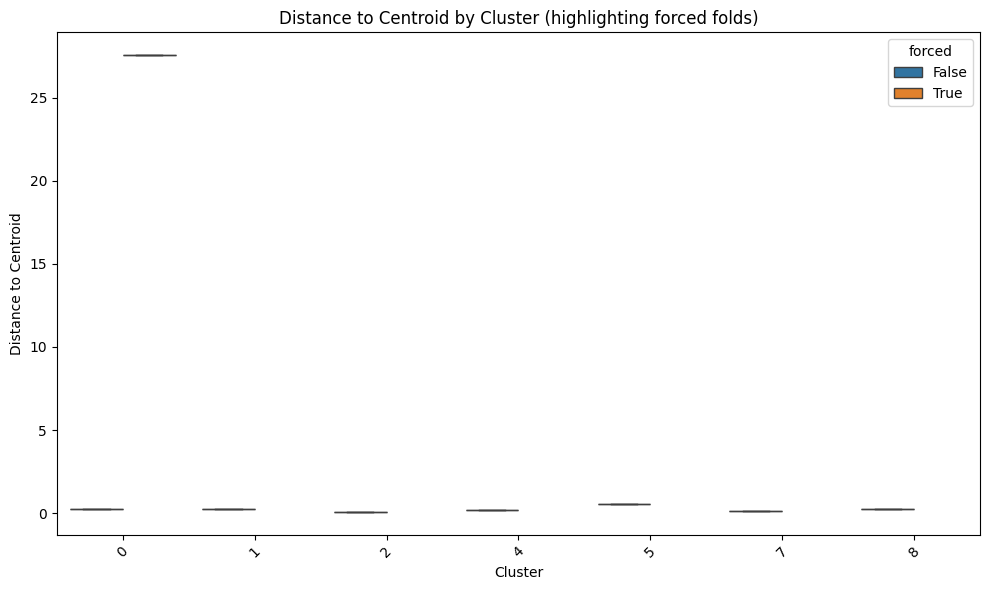

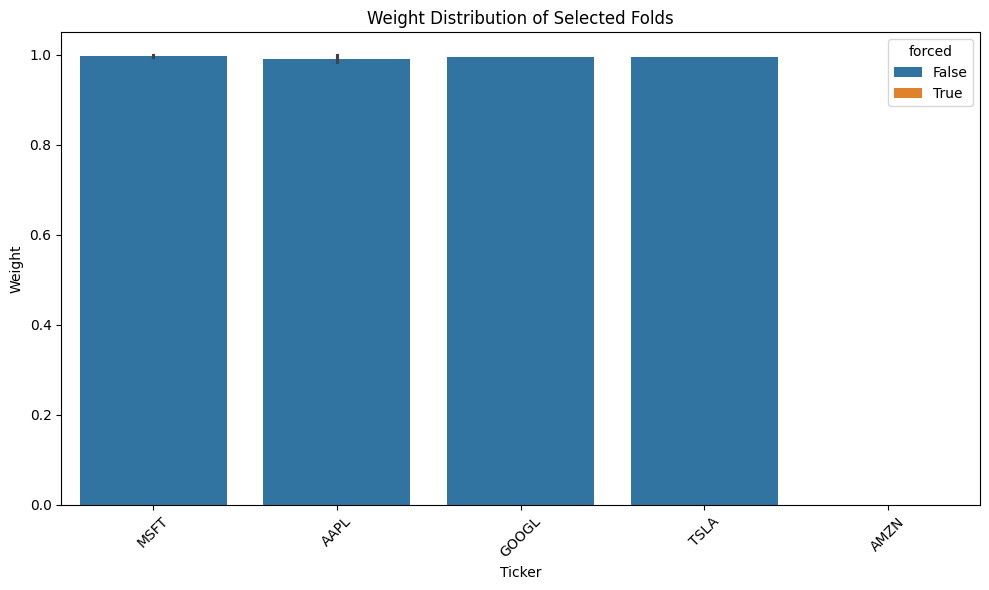

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load selected folds (kết quả sau refine) thành DataFrame
output_dir = 'data/processed_folds/arima'
selected_folds_path = os.path.join(output_dir, 'arima_tuning_folds.json')
with open(selected_folds_path, 'r') as f:
    selected_folds = pd.DataFrame(json.load(f))  # Chuyển từ list[dict] thành DataFrame

# Plot 1: Boxplot of distance_to_centroid by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_folds, x='cluster', y='distance_to_centroid', hue='forced')
plt.title('Distance to Centroid by Cluster (highlighting forced folds)')
plt.xlabel('Cluster')
plt.ylabel('Distance to Centroid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Barplot of weight by ticker
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_folds.sort_values(by='weight', ascending=False), x='ticker', y='weight', hue='forced')
plt.title('Weight Distribution of Selected Folds')
plt.ylabel('Weight')
plt.xlabel('Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

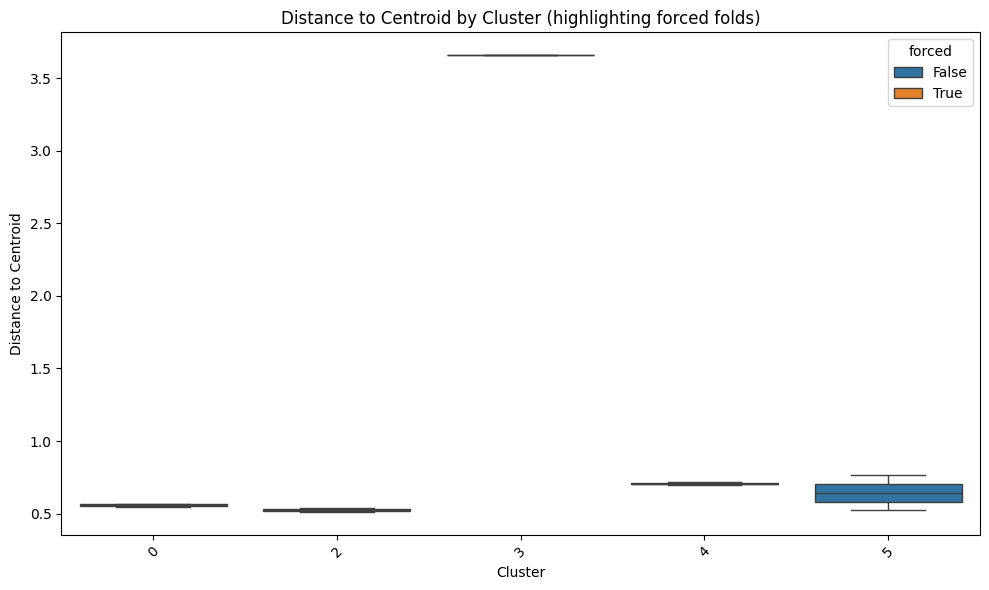

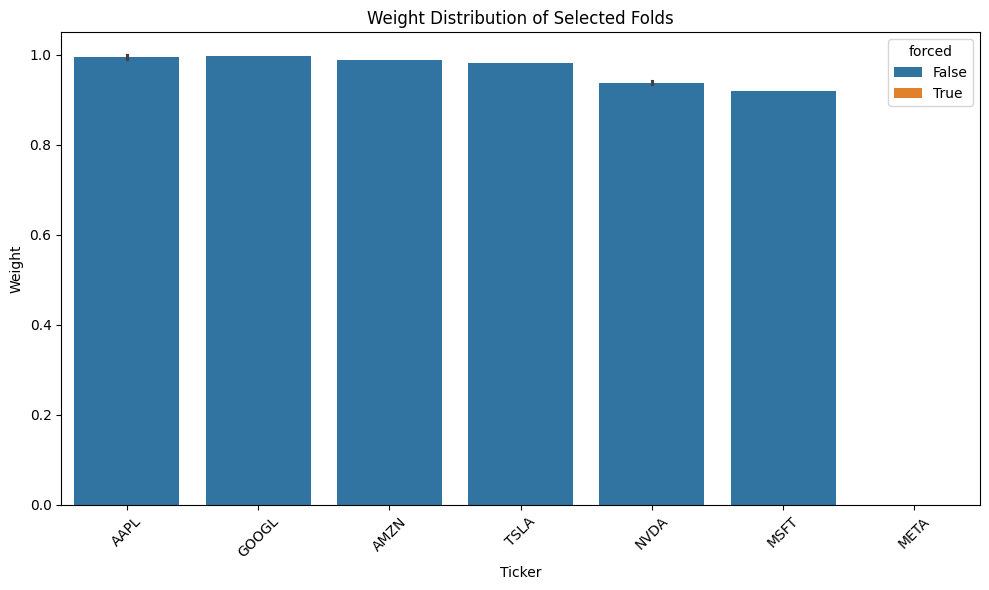

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load selected folds (kết quả sau refine) thành DataFrame
output_dir = 'data/processed_folds/lstm'
selected_folds_path = os.path.join(output_dir, 'lstm_tuning_folds.json')
with open(selected_folds_path, 'r') as f:
    selected_folds = pd.DataFrame(json.load(f))  # Chuyển từ list[dict] thành DataFrame

# Plot 1: Boxplot of distance_to_centroid by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_folds, x='cluster', y='distance_to_centroid', hue='forced')
plt.title('Distance to Centroid by Cluster (highlighting forced folds)')
plt.xlabel('Cluster')
plt.ylabel('Distance to Centroid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Barplot of weight by ticker
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_folds.sort_values(by='weight', ascending=False), x='ticker', y='weight', hue='forced')
plt.title('Weight Distribution of Selected Folds')
plt.ylabel('Weight')
plt.xlabel('Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ARIMA Meta Features Mean Avg Analysis

In [19]:
import pandas as pd
meta_df_full_arima = pd.read_csv('data/processed_folds/arima_meta/meta_arima_full_with_clusters.csv')

In [ ]:
meta_features_only = meta_df_full_arima.drop(columns=['fold_id', 'ticker', 'cluster_size'])

cluster_means = meta_features_only.groupby('cluster').mean()
print(cluster_means)

         positive_ratio  volatility_std      acf1      acf2  trend_slope  \
cluster                                                                    
0              0.324530        0.016168  0.105300 -0.057069     0.000589   
1              0.263039        0.018826  0.025211  0.024209     0.002627   
2              0.334638        0.020850  0.054283 -0.055820     0.001078   
3              0.305930        0.021232  0.052126 -0.043162     0.001047   
4              0.330357        0.029658  0.033239 -0.003081     0.003996   

         skewness   kurtosis  distance_to_centroid  
cluster                                             
0       -0.184329   0.697797              0.957058  
1        1.771508  17.869735              3.224013  
2       -0.315999   4.672271              1.725881  
3       -0.657267  11.152141              2.804272  
4        2.237993  26.757250              4.532342  


## Visualization 

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(meta_df_full_arima.drop(columns=['fold_id', 'ticker', 'cluster', 'cluster_size']))
labels = meta_df_full_arima['cluster']

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2f}")

Variance explained by PC1: 0.93
Variance explained by PC2: 0.06


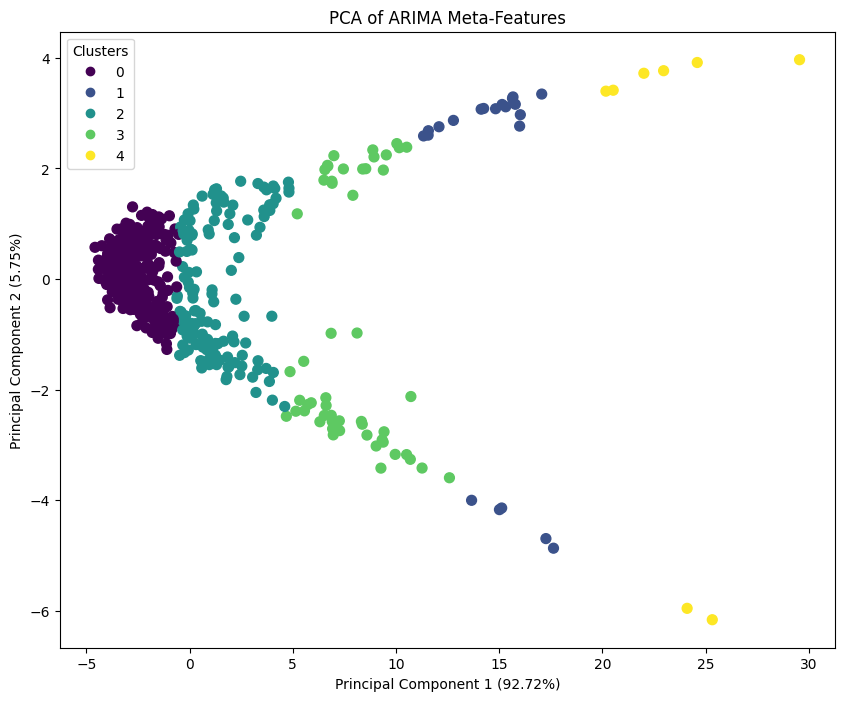

In [22]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('PCA of ARIMA Meta-Features')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

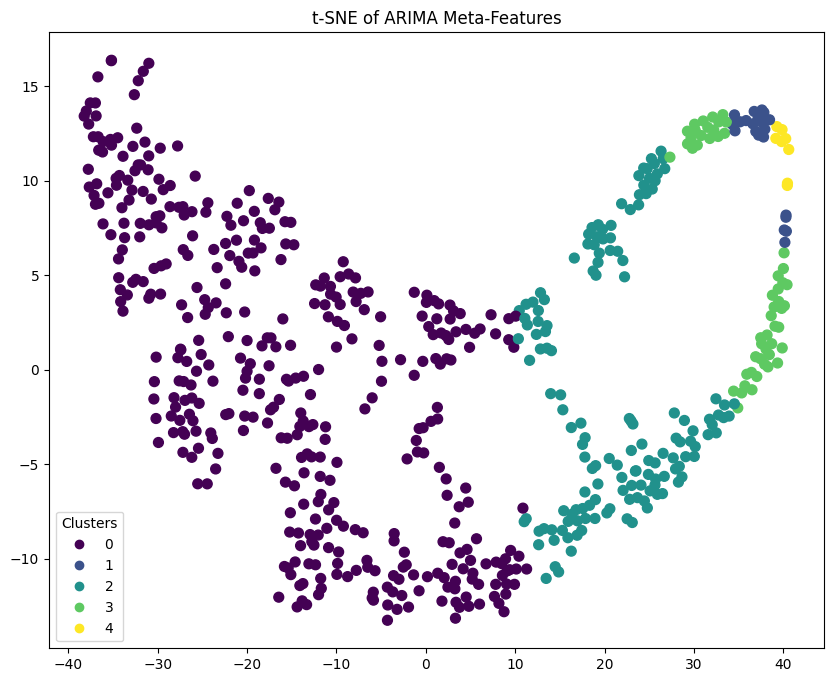

In [24]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
plt.title('t-SNE of ARIMA Meta-Features')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

## LSTM Meta Features Mean Avg Analysis

In [26]:
import pandas as pd
meta_df_full_lstm = pd.read_csv('data/processed_folds/lstm_meta/meta_lstm_full_with_clusters.csv')

In [27]:
meta_features_only = meta_df_full_lstm.drop(columns=['fold_id', 'ticker', 'cluster_size'])

cluster_means = meta_features_only.groupby('cluster').mean()
print(cluster_means)

         positive_ratio  volatility_std  trend_slope   PC1_mean   PC1_std  \
cluster                                                                     
0              0.320697        0.020940    -0.000740  -2.141655  0.092872   
1              0.304376        0.016722     0.000679  14.696939  0.601276   
2              0.420635        0.025197     0.001106  -3.980544  0.108340   
3              0.282946        0.014029     0.000922   1.471376  0.171314   
4              0.365508        0.018504     0.003486  -2.167034  0.124722   
5              0.309524        0.016194     0.000764   6.809054  0.325177   
6              0.306176        0.014666     0.000634  -0.121260  0.158959   

         PC2_mean   PC2_std  PC3_mean   PC3_std  PC4_mean   PC4_std  PC5_mean  \
cluster                                                                         
0       -1.124380  1.616325 -0.246719  0.239223  0.033799  1.289665 -0.001454   
1       -0.293224  1.390958 -0.002910  0.203959 -0.022556  1.07